# **COVID19 ICU Twitter Analysis**



## Mount drive, load data

In [2]:
# Mount the drive (for Google Colab)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# Load data (data is in Excel format)
import pandas as pd
df = pd.read_excel('/content/drive/MyDrive/Research/icu_covid_jan_jun2020_120555/combined_syso_icu_mentions.xlsx')
# df = pd.read_excel('/content/combined_syso_icu_mentions.xlsx')

In [9]:
print(df.head())

   file_no  No   Source                    Host  \
0        1   1  TWITTER  http://www.twitter.com   
1        1   2  TWITTER  http://www.twitter.com   
2        1   3  TWITTER  http://www.twitter.com   
3        1   4  TWITTER  http://www.twitter.com   
4        1   5  TWITTER  http://www.twitter.com   

                                                Link     Date_ET   Time_ET  \
0  http://twitter.com/TapioKantola/statuses/12430...  2020-03-25  23:42:07   
1  http://twitter.com/TapioKantola/statuses/12430...  2020-03-25  23:42:07   
2  http://twitter.com/JFRANCISCOPED/statuses/1243...  2020-03-25  23:37:09   
3  http://twitter.com/musicloverhoney/statuses/12...  2020-03-25  23:36:14   
4  http://twitter.com/TapioKantola/statuses/12430...  2020-03-25  23:34:39   

              LocalTime  Category        Author_ID  ...  \
0  25 Mar 2020 23:42:07       NaN     TapioKantola  ...   
1  25 Mar 2020 23:38:59       NaN     TapioKantola  ...   
2  25 Mar 2020 23:37:09       NaN    JFRANCISCO

In [10]:
# df.columns.tolist()

## Some descrptive analysis

In [11]:
# Number of rows
num_rows = df.shape[0]
print(num_rows)

120555


In [12]:
# Number of unique_links under "Link" column
len(df['Link'].unique())

120555

In [13]:
# Number of unique_links under "Unique ID" column
len(df['Unique ID'].unique())

120555

In [14]:
# Number of unique_links under "Author ID" column
len(df['Author_ID'].unique())

77966

## Language

In [15]:
# Number of unique languages
len(df['Language'].unique())

62

In [16]:
# Count the number of rows for each country
language_counts = df['Language'].value_counts()
print(language_counts)

Language
English      95198
Thai          8394
Japanese      5002
Hindi         3909
Spanish       1340
             ...  
Dhivehi          1
Icelandic        1
Sinhalese        1
Burmese          1
Sindhi           1
Name: count, Length: 62, dtype: int64


In [17]:
# % of rows for each language caterory

# Number of rows for each language caterory
language_counts = df['Language'].value_counts()

# Total number of rows
total_rows = len(df)

# % of each language category
language_percentages = (language_counts / total_rows) * 100

print(language_percentages)

Language
English      78.966447
Thai          6.962797
Japanese      4.149144
Hindi         3.242503
Spanish       1.111526
               ...    
Dhivehi       0.000829
Icelandic     0.000829
Sinhalese     0.000829
Burmese       0.000829
Sindhi        0.000829
Name: count, Length: 62, dtype: float64


## Country

In [18]:
len(df['Country'].unique())

192

In [19]:
# Number of rows for each country
country_counts = df['Country'].value_counts()
print(country_counts)

Country
USA                          23618
UK                           14920
India                         5567
Canada                        3362
Australia                     2217
                             ...  
Andorra                          1
Saint Pierre and Miquelon        1
Bosnia and Herzegovina           1
Espanya                          1
Republic of the Congo            1
Name: count, Length: 191, dtype: int64


## Gender

In [20]:
# Number of unique gender
len(df['Gender'].unique())

3

In [21]:
# Number of rows for each gender
gender_counts = df['Gender'].value_counts()
print(gender_counts)

Gender
MALE      39694
FEMALE    31034
Name: count, dtype: int64


In [22]:
# % of rows for each gender

# Number of rows for each gender
gender_counts = df['Gender'].value_counts()

# Total number of rows
total_rows = len(df)

# % of each gender category
gender_percentages = (gender_counts / total_rows) * 100

print(gender_percentages)

Gender
MALE      32.926050
FEMALE    25.742607
Name: count, dtype: float64


In [23]:
df['Gender'].unique()

array(['MALE', nan, 'FEMALE'], dtype=object)

## Tweet frequency over time

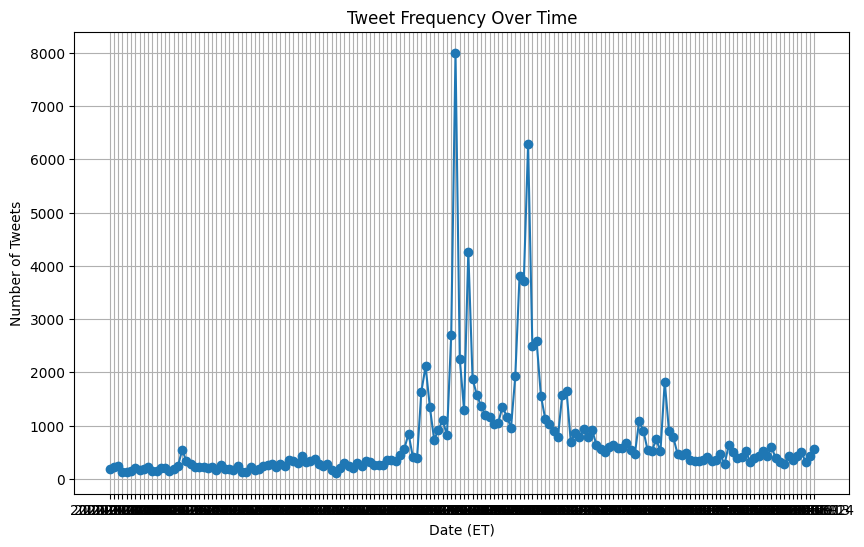

In [24]:
import matplotlib.pyplot as plt

df['Date_ET)'] = pd.to_datetime(df['Date_ET'])
tweet_counts_by_date = df.groupby('Date_ET')['Contents'].count()

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts_by_date.index, tweet_counts_by_date.values, marker='o', linestyle='-')
plt.title('Tweet Frequency Over Time')
plt.xlabel('Date (ET)')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


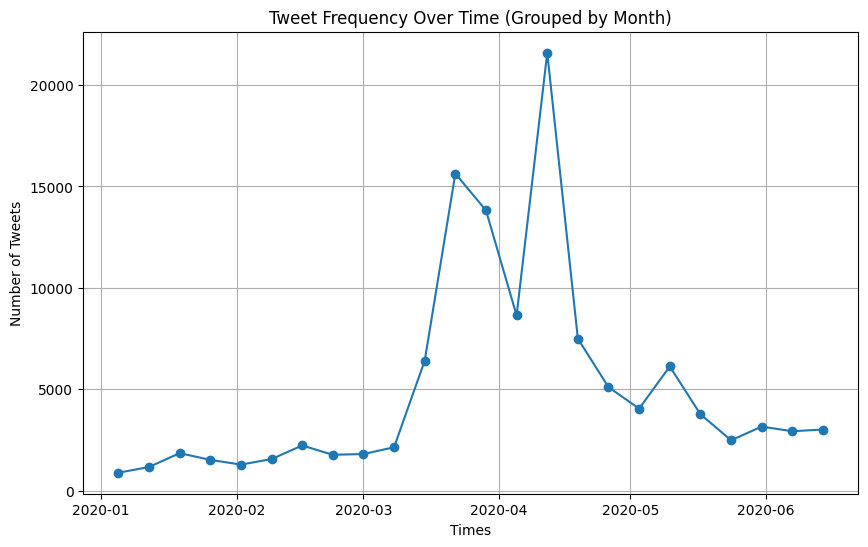

In [25]:
import matplotlib.pyplot as plt

df['Date_ET'] = pd.to_datetime(df['Date_ET'])
tweet_counts_by_month = df.resample('W', on='Date_ET')['Contents'].count()

# Plot the time series graph
plt.figure(figsize=(10, 6))
plt.plot(tweet_counts_by_month.index, tweet_counts_by_month.values, marker='o', linestyle='-')
plt.title('Tweet Frequency Over Time (Grouped by Month)')
plt.xlabel('Times')
plt.ylabel('Number of Tweets')
plt.grid(True)
plt.show()


## Sentiment analysis

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Analyze sentiment for each tweet & classify it into pos, neg, or neu
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
for index, row in df.iterrows():
    content = row['Contents']
    sentiment_score = sid.polarity_scores(content)
    if sentiment_score['compound'] > 0.05:
        sentiment_counts['positive'] += 1
    elif sentiment_score['compound'] < -0.05:
        sentiment_counts['negative'] += 1
    else:
        sentiment_counts['neutral'] += 1

# Freq of tweets for each sentiment category
for sentiment, count in sentiment_counts.items():
    print(f"{sentiment.capitalize()} sentiment: {count} tweets")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Positive sentiment: 70740 tweets
Negative sentiment: 18819 tweets
Neutral sentiment: 30996 tweets


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize the SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Assuming you already have a DataFrame named `df` with the text data in the "Contents" column

# Analyze sentiment for each tweet and classify it into positive, negative, or neutral
sentiment_counts = {'positive': 0, 'negative': 0, 'neutral': 0}
total_tweets = len(df)  # Total number of tweets

for index, row in df.iterrows():
    content = row['Contents']
    sentiment_score = sid.polarity_scores(content)
    if sentiment_score['compound'] > 0.05:
        sentiment_counts['positive'] += 1
    elif sentiment_score['compound'] < -0.05:
        sentiment_counts['negative'] += 1
    else:
        sentiment_counts['neutral'] += 1

# Print the frequency and percentage of tweets for each sentiment category
for sentiment, count in sentiment_counts.items():
    percentage = (count / total_tweets) * 100
    print(f"{sentiment.capitalize()} sentiment: {count} tweets ({percentage:.2f}% of total)")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Positive sentiment: 70740 tweets (58.68% of total)
Negative sentiment: 18819 tweets (15.61% of total)
Neutral sentiment: 30996 tweets (25.71% of total)


## Topic modeling - in progress

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Convert text to lowercase & remove punctuation
df['Contents'] = df['Contents'].str.lower()
df['Contents'] = df['Contents'].str.replace('[^\w\s]', '')

# Create a CountVectorizer - convert text data into a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(df['Contents'])

# Apply LDA
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

# Top 10 words for each topic
n_top_words = 10
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


## Computaitonal Framing analysis - in progress